In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D ,MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
train_gen=ImageDataGenerator(rescale=1/.255,
                             rotation_range=7,
                             zoom_range=0.2,
                             horizontal_flip=True)

In [10]:
train_dataset=train_gen.flow_from_directory('/content/drive/MyDrive/computer vision/archive (4)/training',
                                                     target_size=(64,64),batch_size=8,
                                                     class_mode='categorical',
                                                     shuffle=True)

Found 253 images belonging to 2 classes.


In [12]:
train_dataset.class_indices

{'no': 0, 'yes': 1}

In [18]:
(1152+2)/2 # choosing the number of neurons in the hidden layer w.r.t the vector size

577.0

In [19]:
network=Sequential()
network.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=577,activation='relu'))
network.add(Dense(units=2,activation='softmax'))

network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [20]:
network.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [39]:
history=network.fit_generator(train_dataset,epochs=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
32/32 [==============================] - 3s 86ms/step - loss: 0.1456 - accuracy: 0.9526
Epoch 2/50
32/32 [==============================] - 3s 85ms/step - loss: 0.1061 - accuracy: 0.9684
Epoch 3/50
32/32 [==============================] - 3s 84ms/step - loss: 0.1168 - accuracy: 0.9447
Epoch 4/50
32/32 [==============================] - 3s 85ms/step - loss: 0.1816 - accuracy: 0.9447
Epoch 5/50
32/32 [==============================] - 3s 85ms/step - loss: 0.1449 - accuracy: 0.9644
Epoch 6/50
32/32 [==============================] - 3s 86ms/step - loss: 0.1206 - accuracy: 0.9565
Epoch 7/50
32/32 [==============================] - 3s 87ms/step - loss: 0.1721 - accuracy: 0.9447
Epoch 8/50
32/32 [==============================] - 3s 86ms/step - loss: 0.2670 - accuracy: 0.9368
Epoch 9/50
32/32 [==============================] - 3s 86ms/step - loss: 0.0554 - accuracy: 0.9842
Epoch 10/50
32/32 [==============================] - 3s 86ms/step - loss: 0.1070 - accuracy: 0.9605
Epoch 11/

In [52]:
def tumor(number):
    
    if number == 0:
        
        return "Not a tumor"
    
    else:
        
        return "a tumor"

57.464033365249634% Confidence This Is a tumor


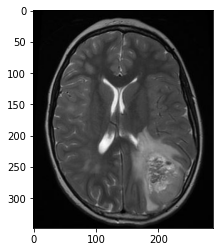

In [54]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/computer vision/archive (4)/testing/brain_tumor_dataset/yes/Y100.JPG')

x = np.array(img.resize((64,64)))

x = x.reshape(1, 64, 64, 3)

result = network.predict([x])

classification = np.where(result == np.amax(result))[1][0]

#
print(str(result[0][classification]*100) + '% Confidence This Is ' + tumor(classification))

plt.imshow(img)